# introducción a la visualización de Datos.

Algunos años atrás el reto era como obtener millones de datos, pero en la actualidad esto ya no es un problema, no más hay que visitar el sitio web de [ChEMBL](https://www.ebi.ac.uk/chembl/) donde podemos encontrar una cantidad interesante de moléculas bioactivas con ciertas características para ser utilizadas como parte de análisis en el desarrollo de nuevos medicamentos.

Si bien el campo de los datos va más allá de su manipulación, también como científicos es valioso desarrollar habilidades relacionadas con la presentación de nuestros hallazgos. Y si quisiéramos ir un poco más allá, algo importante a tener en cuenta aparte de una buena visualización es tener una historia que contar.

En Notebooks anteriores aprendimos a manipular algunos conjuntos de datos y para ello vimos desde lo básico de Python hasta lo más avanzado como lo son los [DataFrame](../2_PART_TWO/2.1_Dataframes.ipynb), ahora es tiempo de aprender a crear gráficas *(Visualizaciones)* de nuestros datos utilizando dos de las librerías más famosas en el mundo `Matplotlib` y `Seaborn`. Para la mayoría de los casos, con la primera de éstas sería más que suficiente, pero para realizar gráficas un poco más complejas vamos a utilizar la segunda. Con ellas dos trataremos de crear la mayoría de las visualizaciones más populares.

### introducción a Matplotlib

Según el sitio web **Matplotlib es una librería para la creación de visualizaciones estáticas, animadas e interactivas en Python**. Simple, ¿recuerdan el concepto de Libreria? Si no [aqui](https://www.geeksforgeeks.org/libraries-in-python/) pueden leer un poco más al respecto. No hay mucho que agregar, más allá de que la librería ya se encuentra instalada como parte de las dependencias del ambiente virtual del curso.

> En caso de que la librería no esté instalada, puede utilizar el comando `pip install matplotlib`, o `conda install matplotlib`.

Antes de empezar a graficar es bueno desarrollar un entendimiento básico de cómo funciona esta librería, dado que en muchos escenarios veremos que es necesario realizar ciertas configuraciones.

#### El módulo Pyplot

Por lo general el módulo `pyplot` es el foco de interés cuando queremos gráficas con `Matplotlib`, a pesar de que la librería posee una gran variedad de funcionalidades asociadas a otras características como la configuración de los estilos y las animaciones. Por lo general, siempre importaremos el módulo de la siguiente forma:

```
    import matplotlib.pyplot as plt
```

Para crear una gráfica o **plot** debemos seguir una serie de pasos o llamados de ciertas funciones *(métodos)* que pertenecen al módulo `pyplot`.


Veamos cómo se hace a continuación, empecemos importando el dataset de [EGG del invididuo 364](./data/co2a0000364.rd.000) y el [EEG del individuo 365](./data/co2a0000365.rd.003) para luego ser convertidos en DataFrames:


In [1]:
import requests
import tarfile
import gzip
import pandas as pd
from io import BytesIO

# Se descargada el archivo de datos por medio de la librería requests. Una vez descargados los datos, se convierten en un Dataframe
with requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000364.tar.gz", stream=True) as rx, tarfile.open(fileobj=rx.raw, mode="r:gz") as tarobj:
    tarobj.extractall('./data/')
    with gzip.open('data/co2a0000364/co2a0000364.rd.000.gz', "rb") as f:
        df364 = pd.read_csv(f, delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])
    
with requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/eeg_full/co2a0000365.tar.gz", stream=True) as rx, tarfile.open(fileobj=rx.raw, mode="r:gz") as tarobj:
    tarobj.extractall('./data/')
    with gzip.open('data/co2a0000365/co2a0000365.rd.003.gz', "rb") as f:
        df365 = pd.read_csv(f, delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])



Ahora inspecciones un poco la data que previamente descargamos, en el dataset encontraremos el número del trial o test, la posición del sensor y el valor leído por el sensor, esto tanto para el invidio 364 como el individuo 365, solo por si acaso estas lecturas del EEG permiten “medir” la predisposición genética de los dos individuos al alcoholismo:


In [2]:
df364.head()

,trial_number,sensor_position,sample_number,sensor_value
0,0,FP1,0,-8.921
1,0,FP1,1,-8.433
2,0,FP1,2,-2.574
3,0,FP1,3,5.239
4,0,FP1,4,11.587


In [1]:
# Se importa librerias
import calendar, random, datetime
import pandas as pd
import numpy as np

# Se cargan los datos generados por el EEG para los sujetos 364 y 365, se da nombde a las columnas
df_alcoholisim364 = pd.read_csv("./data/co2a0000364.rd.000", delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])
df_alcoholisim365 = pd.read_csv("./data/co2a0000365.rd.003", delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])

# funcion que genera fechas de forma aleatoria
def random_date(start, end):
    return start + datetime.timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Se generan la cantidad de fechas necesarias de acuerdo al número de observaciones del EEG
dates_arr_subject364 = np.array([pd.to_datetime(random_date(datetime.datetime(day=1, month=1, year=2000), datetime.datetime(day=31, month=12, year=2022))) for i in range(len(df_alcoholisim364))])
dates_arr_subject365 = np.array([pd.to_datetime(random_date(datetime.datetime(day=1, month=1, year=2000), datetime.datetime(day=31, month=12, year=2022))) for i in range(len(df_alcoholisim365))])

# Se generan los dataframes a partir de los datos del EEG y las fechas
df_subject365 = df_alcoholisim365.join(pd.DataFrame(dates_arr_subject365, columns=['datetime'])).sort_values(by="datetime")
df_subject364 = df_alcoholisim364.join(pd.DataFrame(dates_arr_subject364, columns=['datetime'])).sort_values(by="datetime")

# Se visualiza el Dataframe del sujeto 365
df_subject365

,trial_number,sensor_position,sample_number,sensor_value,datetime
13594,3,C1,230,0.041,2000-01-01 02:00:51
55,3,FP1,55,-1.587,2000-01-02 05:32:33
15164,3,P2,1,-6.012,2000-01-03 06:39:35
5302,3,CP1,162,-2.472,2000-01-03 07:28:01
13945,3,PO7,67,39.988,2000-01-03 09:03:47
...,...,...,...,...,...
1004,3,F8,233,-7.874,2022-12-29 17:25:06
1320,3,AF2,35,-0.722,2022-12-29 18:32:07
11788,3,TP8,223,6.683,2022-12-30 07:59:20
10615,3,C6,78,3.001,2022-12-30 11:42:29



Bien ahora podemos explorar los datos visualmente. De acuerdo con la BD el dispositivo *EEG*, (Electroencefalograma), es un dispositivo que mide la actividad eléctrica del cerebro, para entender un poco más de cómo funciona dar [clic](https://www.healthline.com/health/eeg#What-is-an-EEG?). A nosotros si nos interesa saber un poco como funciona este dispositivo medico electrónico, para poder encontrar visualizaciones que nos den información al respecto de los individuos, pero básicamente sobre la cabeza es puesta una cantidad de sensores que en un intervalo de tiempo dado (1sg) toma la medida de la fluctuación eléctrica del cerebro en voltios, es por esta razón que agregaremos al dataset una columna “time” dada por la cantidad de impulsos recibidos en un lapso tiempo dado:


In [207]:
import numpy as  np

# Se eliminan los valores del dataframe que no estan asociados a ningun trial (Test).
dfA = df364[df364['trial_number'] != '#']
dfB = df365[df365['trial_number'] != '#']

# los datos son de un segundo (256 datos en un segundo, por sensor), crear la variable de tiempo para cada sensor
# ver https://kdd.ics.uci.edu/databases/eeg/eeg.data.html
time = np.linspace(0,1,256)

# colocar time en cada sensor (64 veces)
all_time = np.array(list(time) * 64)

#crear columna con el time en milisegundos
dfA['time'] = all_time
dfB['time'] = all_time

# Se eliminan las columnas 'trial_number' y 'sample_number'
dfA.drop(['trial_number', 'sample_number'], axis=1, inplace=True)
dfB.drop(['trial_number', 'sample_number'], axis=1, inplace=True)

/tmp/ipykernel_839/3223920917.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['time'] = all_time
/tmp/ipykernel_839/3223920917.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB['time'] = all_time
/tmp/ipykernel_839/3223920917.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA.drop(['trial_number', 'sam

Ahora si los datasets de los dos individuos que de ahora en adelante llamaremos **A** y ** B**, se encuentran ya listos para su visualización:

In [9]:
dfA.head() 
dfB.head()

,sensor_position,sensor_value,time
0,FP1,3.296,0.000000
1,FP1,3.296,0.003922
2,FP1,3.784,0.007843
3,FP1,4.761,0.011765
4,FP1,4.761,0.015686


Empezaremos con la creación de la primera gráfica y para ello, es necesario invocar el método `plot`, de la siguiente forma:

```comand
    plt.plot(x-axis, y-axis)
```

en donde `x-axis` y `y-axis` son los valores para los ejes respectivos del gráfico, y notemos que aun a este punto no tenemos nuestra visualización, porque para ello es necesario invocar el método `show` como lo vemos a continuación:

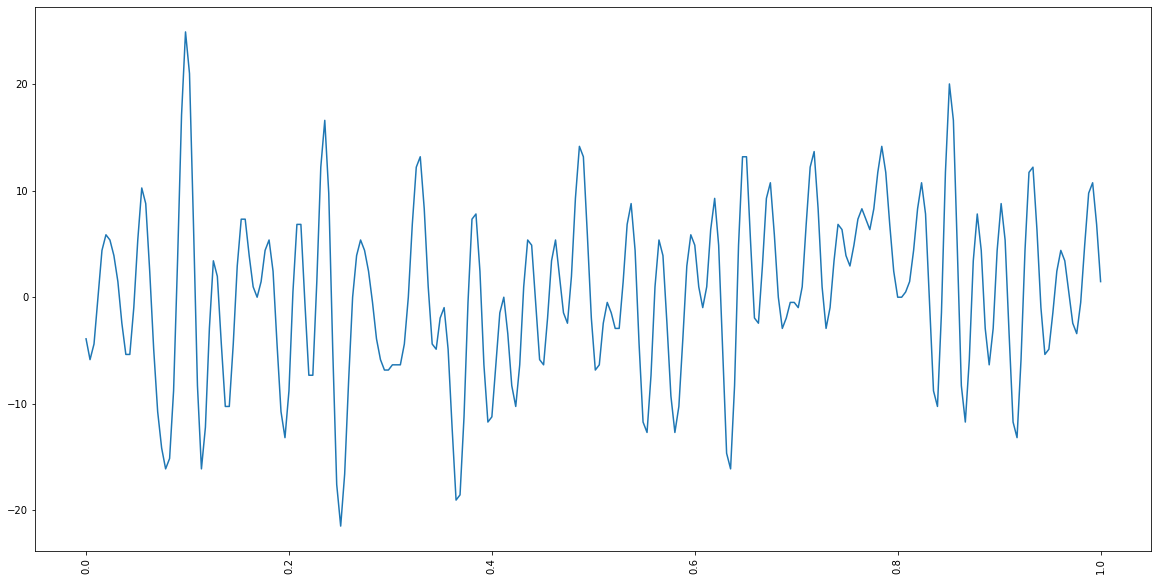

In [208]:

# Se importa el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición T8
df_sample = dfA[dfA["sensor_position"] == "T8"]

# Se configura el tamaño  del plot
plt.subplots(figsize=(20, 10))

# Se crea la gráfica por medio del método plot
plt.plot(df_sample.time, df_sample.sensor_value)

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Como resultado tenemos un gráfico de líneas o por su nombre en inglés un **Line Plot**. En el se puede observar la lectura del sensor T8 del EEG del individuo A, este valor se encuentra en microvoltios. [Clic aquí para saber un poco más sobre el dataset](https://archive-beta.ics.uci.edu/ml/datasets/eeg+database#Papers).

En resumen, para la realización de una gráfica con `Matplotlib`, se deben seguir los siguientes pasos:

1. Se debe importar el módulo `pyplot` de la librería `Matplotlib`
2. Se debe inicializar la gráfica por medio del método `plot`.
3. Una vez terminada la inicialización y configuración del **plot** se debe invocar la visualización por medio del método `show`.

A veces es necesario crear una gráfica de líneas para comparar dos variables, por ejemplo, si quisiéramos ver la gráfica de la variación de los valores del sensor en la posición *C1* del individuo 364 en comparación con los valores del sensor en la misma posición del individuo 365, haríamos lo siguiente:

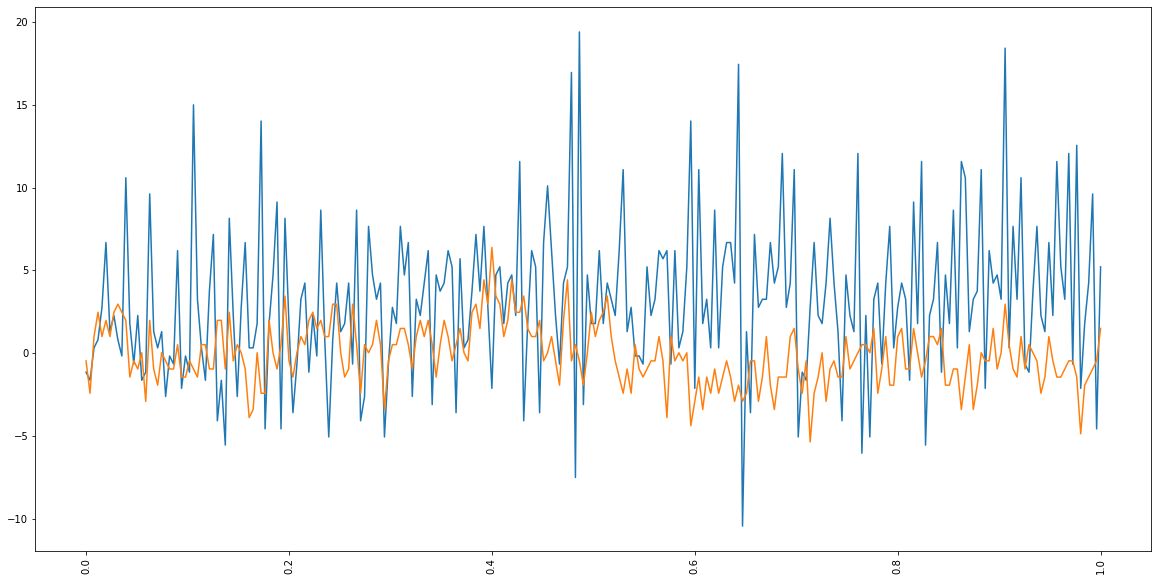

In [209]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición C1 del individuo A y B
dfA_sample = dfA[dfA["sensor_position"] == "C1"]
dfB_sample = dfB[dfB["sensor_position"] == "C1"]

# Se configura el tamaño  del plot
plt.subplots(figsize=(20, 10))

# Se crea la grafica por medio del método plot
plt.plot(dfA_sample.time, dfA_sample.sensor_value)
plt.plot(dfB_sample.time, dfB_sample.sensor_value)

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Se pueden notar como los valores siguen una tendencia muy similar, pero la gráfica a primera vista no nos dice de que se trata, qué tal si le agregamos un poco de presentación.

Ahora, vamos a darle un título y un nombre a sus ejes, y porque no visualizar los datos en una grilla:

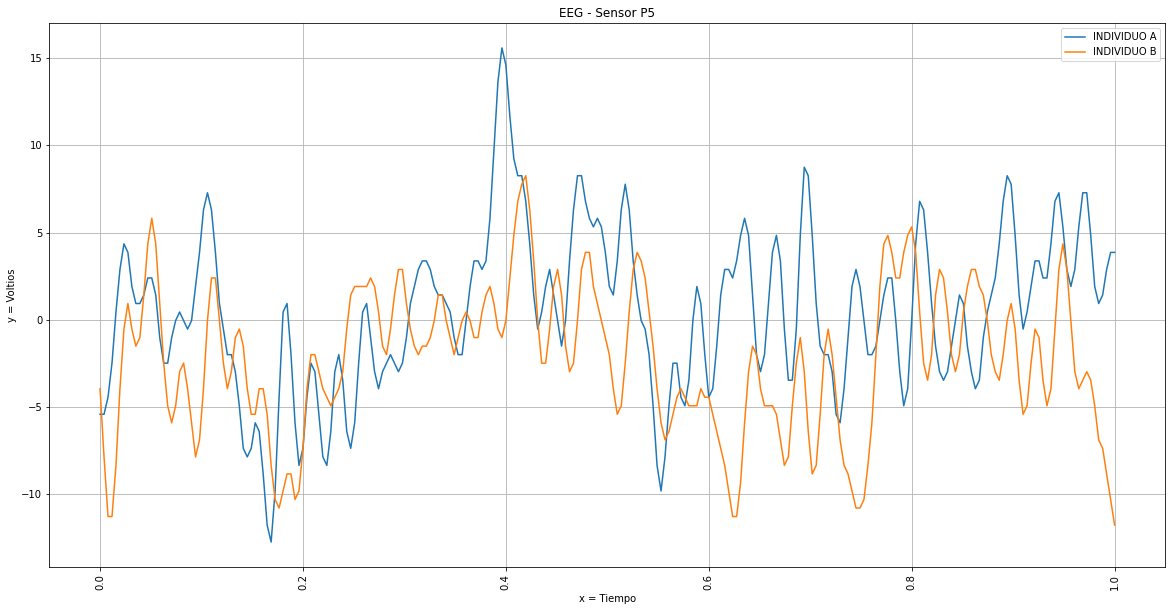

In [210]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición P5 del individuo A y B
dfA_sample = dfA[dfA["sensor_position"] == "P5"]
dfB_sample = dfB[dfB["sensor_position"] == "P5"]

# Se configura el tamaño  del plot
plt.subplots(figsize=(20, 10))

# Se crea la grafica por medio del método plot
plt.plot(dfA_sample.time, dfA_sample.sensor_value)
plt.plot(dfB_sample.time, dfB_sample.sensor_value)

# Se habilita la grilla
plt.grid(True)

# Se le dan nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Voltios')

# Se le da un título a la grafica
plt.title('EEG - Sensor P5')

# Se configura las leyendas de las líneas
plt.legend(['INDIVIDUO A', 'INDIVIDUO B'])

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Hasta aquí hemos visto como crear un gráfico de una línea y de múltiples líneas y con ello hemos aprendido algunos de los métodos básicos de configuración de la librería `Matplotlib`, ahora es el turno para configurar `Colores`, `Estilos` y `Marcadores`.

En especial hablaremos del tercer parámetro del método `plot`:

```
    plt.plot(x, y, '[color][marker][linestyle]')
```

En este caso y retomando la gráfica anterior cambiaremos el color de las líneas:

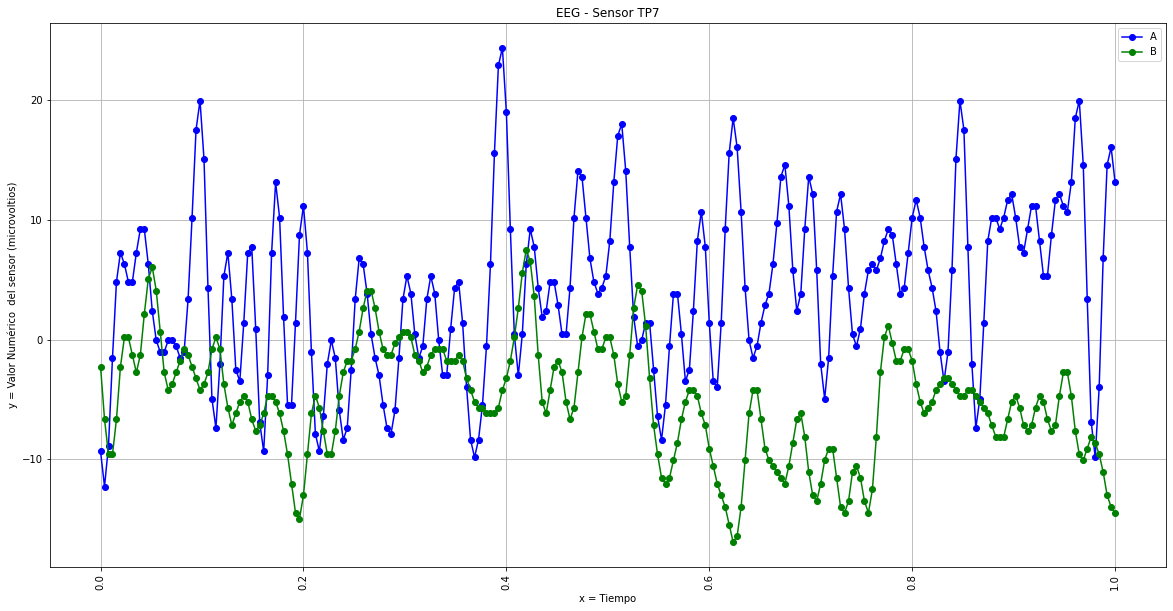

In [211]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un Dataframe a partir de las lecturas de los sensores en la posición TP7 del individuo A y B
dfA_sample = dfA[dfA["sensor_position"] == "TP7"]
dfB_sample = dfB[dfB["sensor_position"] == "TP7"]

# Se configura el tamaño  del plot
plt.subplots(figsize=(20, 10))

# Se crea la gráfica por medio del método plot
plt.plot(dfA_sample.time, dfA_sample.sensor_value, 'ob-')
plt.plot(dfB_sample.time, dfB_sample.sensor_value, 'og-')

# Se habilita la grilla
plt.grid(True)

# Se le dan nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Valor Numérico  del sensor (microvoltios)')

# Se le da un título a la grafica
plt.title('EEG - Sensor TP7')

# Se configura las leyendas de las líneas graficadas
plt.legend(['A', 'B'])

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

A pesar de que nuestra salida es la misma, las líneas tienen ahora un estilo diferente. Aquí el único cambio fue el tercer argumento del método `plot`, en donde se pueden configurar las opciones de visualizaciones y estilos del gráfico. 

*Para saber cómo darle colores, estilos y marcadores a tus graficas lo mejores es que des [clic aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).*


Como vieron hay que hacer mucho trabajo para construir una gráfica de visualización directamente con `Matplotlib`, pero ¿qué tal si hay una manera más sencilla de lograrlo? Bueno seria por intermedio de librería de `DataFrames`, tan solo se necesitan una o un par de líneas de Código. miremos el ejemplo a continuación:

<AxesSubplot:xlabel='time'>

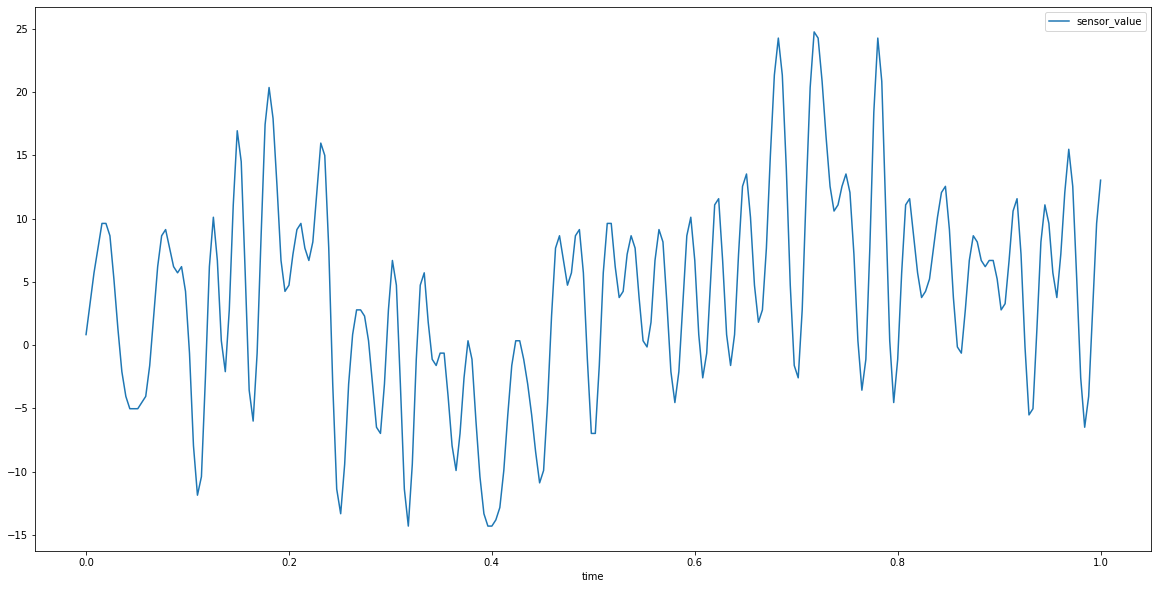

In [213]:
dfA[dfA["sensor_position"] == "FP2"].plot(x="time", y="sensor_value", figsize=(20,10))

Ahora y antes de darle paso a los métodos de visualización de la librería `pandas` qué tal si quisiéramos ver en una sola grafica todos los sensores de un individuo en particular, pues bien veamos cómo lograrlo por medio de un `3D Surface Plot` a continuación:

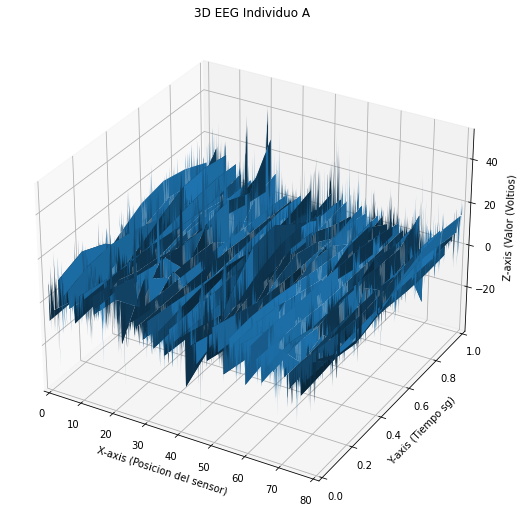

In [214]:
# https://www.geeksforgeeks.org/3d-surface-plotting-in-python-using-matplotlib/
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = np.outer(np.linspace(0, 80, 2048), np.ones(8))
y = np.outer(np.linspace(0, 1, 8), np.ones(2048)).T
sensor_values = dfA['sensor_value'].values.tolist()
z = np.array([sensor_values[n:n+8] for n in range(0, len(sensor_values), 8)])

fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")
ax.plot_surface(x, y, z)

ax.set_xlabel('X-axis (Posicion del sensor)')
ax.set_xlim(0, 80)
ax.set_ylabel('Y-axis (Tiempo sg)')
ax.set_ylim(0, 1)
ax.set_zlabel('Z-axis (Valor (Voltios)')
ax.set_zlim(np.min(z), np.max(z))
ax.set_title('3D EEG Individuo A')

plt.show()

### Graficando con Pandas

Desde la librería de `Pandas` podemos invocar directamente la creación de una gráfica, como lo vimos en el anterior ejemplo. Lo interesante es que, los métodos más usuales de la librería, como lo son `Series` y `DataFrame` tiene su propia función `plot`, que no es más que una envoltura del método `plot` de `Matplotlib`.

#### Grafico de Barras

Otra de las visualizaciones más conocidas es el Grafico de Barras o en Ingles el **Bar Chart**. Por lo general estos son los tipos de visualizaciones con las que quizás más interactuamos y nos encontramos familiarizados, aunque no seamos tan letrados en el universo de las estadísticas, este es un gráfico que se entiende a primera vista.

Tratemos ahora de visualizar y resumir la información de nuestro dataset [adult](./data/adult.data):



In [215]:
import pandas as pd
import numpy as np

df_adults = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    names=['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income'],
    header=None,
    skipinitialspace=True
)

df_adults.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Empecemos graficando el estado marital de los adultos presentes en el dataset:

<AxesSubplot:xlabel='maritalstatus'>

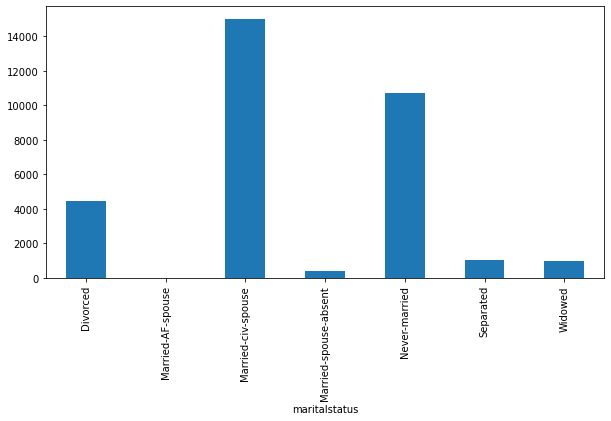

In [220]:
df_adults.groupby(["maritalstatus"]).agg("size").plot.bar(legend=False, figsize=(10, 5))

Ahora agreguemos dos plots, para saber quiénes bajo la categoría del estado marital ganan entre **>= 50** y **<= 50**, es decir cómo se distribuyen los ingresos por categoría:

<AxesSubplot:xlabel='maritalstatus'>

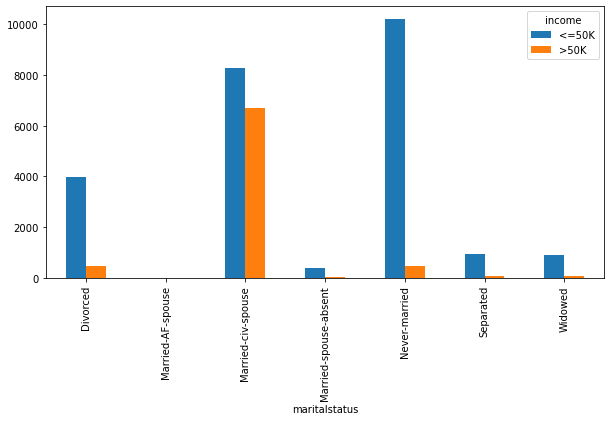

In [219]:
df_adults.groupby(['maritalstatus', 'income']).agg('size').unstack().plot.bar(figsize=(10, 5))

Ahora se puede apreciar algunos tienen ingresos mejor que otros, ¿tendrá algo que ver el estado marital? Sera que para este tipo de visualizaciones sirve el grafico de barras? Bueno, otra de sus aplicaciones más comunes es sobre la visualización de distribuciones de probabilidad, veamos un ejemplo retomando el `Dataframe del EEG del individuo A`:

<AxesSubplot:ylabel='Frequency'>

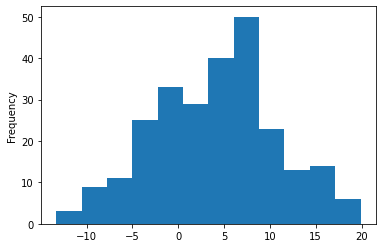

In [231]:
dfA[dfA["sensor_position"] == "FP1"]["sensor_value"].plot.hist(bins=12)

¿Y que distribución siguen los datos? ¿Una distribución normal o binomial? Veamos cómo se pueden visualizar las diferentes de distribuciones de los sensores de los individuos:

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

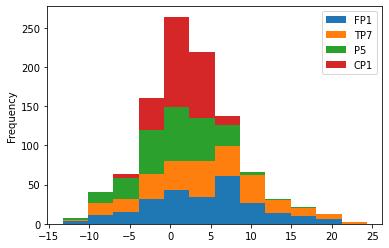

In [233]:
import matplotlib.pyplot as plt;

df = pd.DataFrame({
    "FP1": dfA[dfA["sensor_position"] == "FP1"]["sensor_value"].values.tolist(),
    "TP7":  dfA[dfA["sensor_position"] == "TP7"]["sensor_value"].values.tolist(),
    "P5":  dfA[dfA["sensor_position"] == "P5"]["sensor_value"].values.tolist(),
    "CP1": dfA[dfA["sensor_position"] == "CP1"]["sensor_value"].values.tolist()
})

plt.figure()

df.plot.hist(stacked=True, bins=12)


También es posible verlas por separado:

array([[<AxesSubplot:title={'center':'FP1'}>,
        <AxesSubplot:title={'center':'TP7'}>],
       [<AxesSubplot:title={'center':'P5'}>,
        <AxesSubplot:title={'center':'CP1'}>]], dtype=object)

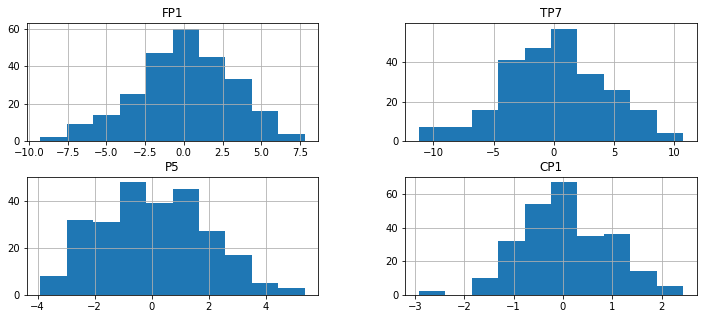

In [236]:
df.diff().hist(figsize=(12, 5))

#### Grafico de Pie con Pandas

Retomemos el dataset de `Adultos` y vamos a ver cuáles son las ocupaciones que tienen los adultos y  aquí es ideal el uso del famosísimo grafico de torta:


array([<AxesSubplot:ylabel='<=50K'>, <AxesSubplot:ylabel='>50K'>],
      dtype=object)

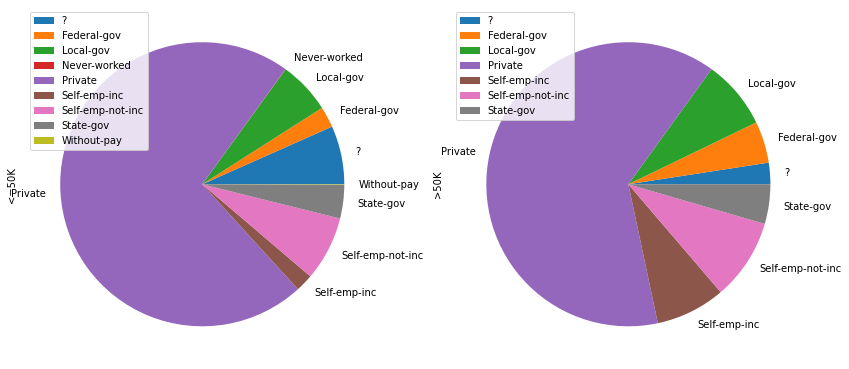

In [238]:
df_adults.groupby(["workclass", "income"]).agg("size").unstack().plot.pie(subplots=True, figsize=(14, 14), legend=True)

¿Ahora a la pregunta tendrá algo que ver la ocupación o el estado marital con el rango de ingresos? Y aquí es donde entra en juego la librería de `Seaborn`.

### Graficando con Seaborn

Bien, para graficar la relación de dos variables se hace uso del aclamado y venerado `Scatter Plot`, para ello vamos a trabajar ahora con el dataset de [iris](./data/iris.data), empecemos por importar sus datos:

In [239]:
import numpy as np

# Se importa la libreria Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "clase"])
df_iris.head()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualizamos la relación que existe entre el `largo_sepalo` y `ancho_sepalo`, para ello haremos del método `replot`:

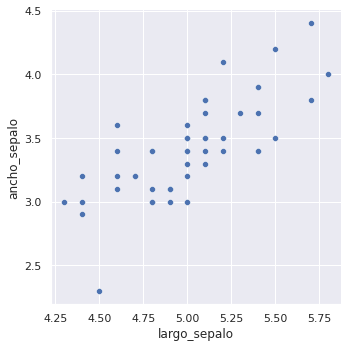

In [240]:

sns.relplot(data=df_iris.query('clase == "Iris-setosa"'), x="largo_sepalo", y="ancho_sepalo")

Esto en cierta medida, muestra la relación que existe entre el largo del pétalo y el ancho, es que claramente sigue una regresión lineal. Y nos tocaría hacer lo mismo por cada clase de iris.

Sera que podemos visualizar todo el dataset de una vez en una misma grafica?


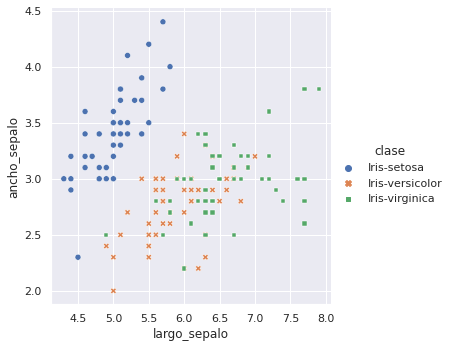

In [241]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo", hue="clase", style="clase")

Quizás un solo grafico sea complejo de leer. ¿Es posible separarlos por clase? Claro que sí:

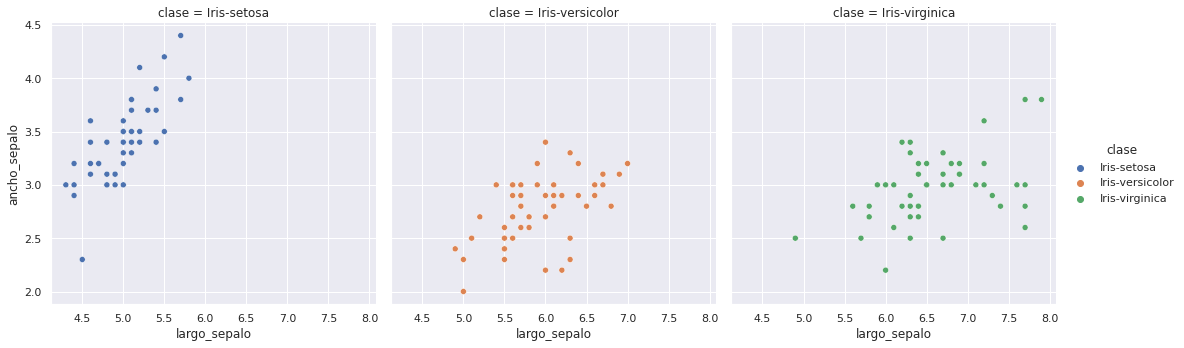

In [242]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo",  hue="clase", col="clase")

¿Y ahora mejora su visualización? Y para finalizar, tratemos de comparar las clases de iris en todas sus medidas por medio de un Grafico **Radar Plot**:

In [276]:
# Se crea una copia del dataset por cada clase de iris (sin la columna clase)
df_setosa = df_iris[df_iris['clase'] == 'Iris-setosa'].drop("clase", axis=1)
df_versicolor = df_iris[df_iris['clase'] == 'Iris-versicolor'].drop("clase", axis=1)
df_virginica = df_iris[df_iris['clase'] == 'Iris-virginica'].drop("clase", axis=1)

# Se aplica la normalizacion por MinMax.
df_setosa = (df_setosa - df_setosa.min()) / (df_setosa.max() - df_setosa.min())
df_versicolor = (df_versicolor - df_versicolor.min()) / (df_versicolor.max() - df_versicolor.min())
df_virginica = (df_virginica - df_virginica.min()) / (df_virginica.max() - df_virginica.min())

# Se crear el DataFrame con los datos normalizados
df_iris_normalized = pd.DataFrame([
    df_setosa.mean(),
    df_versicolor.mean(),
    df_virginica.mean()
], index=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

df_iris_normalized

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
Iris-setosa,0.470667,0.532381,0.515556,0.288000
Iris-versicolor,0.493333,0.550000,0.600000,0.407500
Iris-virginica,0.562667,0.483750,0.438333,0.569091


Antes de visualizar los datos en el **Radar Plot**, es aconsejable normalizar los valores, para ellos se aplicó la normalización MinMax, para saber un poco más [clic aquí](https://ml-concepts.com/2021/10/08/min-max-normalization/). Ahora si con los datos normalizados vamos a crear nuestro plot:

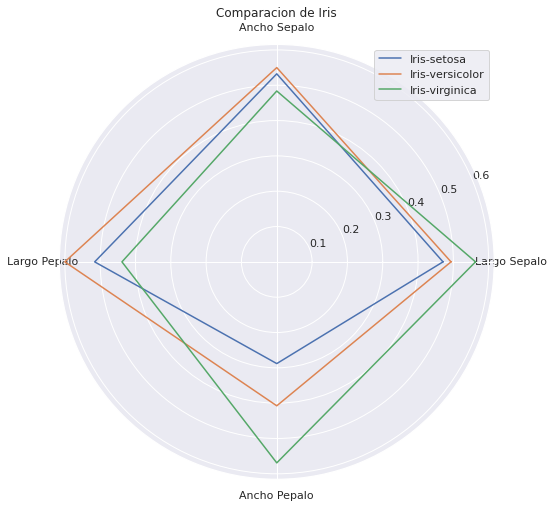

In [279]:
# Se crea una copia del DataFrame
df_radar = df_iris_normalized.copy()

# Se configuran las etiquetas
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len([*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]]))
plt.figure(figsize=(8, 8))

# Se crear el subplot
plt.subplot(polar=True)

# Por cada clase de iris se crea el plot
plt.plot(label_loc, [*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]], label="Iris-setosa")
plt.plot(label_loc, [*df_radar.iloc[[1]].values.tolist()[0], df_radar.iloc[[1]].values.tolist()[0][0]], label="Iris-versicolor")
plt.plot(label_loc, [*df_radar.iloc[[2]].values.tolist()[0], df_radar.iloc[[2]].values.tolist()[0][0]], label="Iris-virginica")

# Se organizan las etiquetas alrededor del grafico
plt.thetagrids(np.degrees(label_loc), labels=['Largo Sepalo', 'Ancho Sepalo', 'Largo Pepalo', 'Ancho Pepalo', ''])

# Se configura la presentacion y se visualiza el grafico
plt.title('Comparacion de Iris')
plt.legend()
plt.show()
